In [4]:
import pennylane as qml
import numpy as np

# Define the quantum device and the number of qubits
num_qubits = 1
dev = qml.device("default.qubit", wires=num_qubits)

# Quantum circuit
@qml.qnode(dev)
def circuit(params, t, w):
    qml.RZ(-t, wires=0)
    qml.RX(w * t, wires=0)
    return qml.expval(qml.PauliZ(0))

# Parameters
t = 0.9  # Replace with your desired value of t
w = 2.0  # Replace with your desired value of w

# Evaluate the circuit
result = circuit([0], t, w)
print(f"e^(-it)cos(wt) = {result}")


e^(-it)cos(wt) = -0.2272020946930871


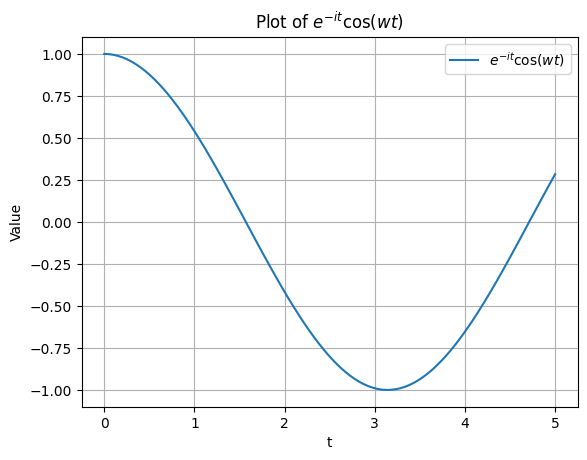

In [5]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# Define the quantum device and the number of qubits
num_qubits = 1
dev = qml.device("default.qubit", wires=num_qubits)

# Quantum circuit
@qml.qnode(dev)
def circuit(params, t, w):
    qml.RZ(-t, wires=0)
    qml.RX(w * t, wires=0)
    return qml.expval(qml.PauliZ(0))

# Parameters
w = 1.0  # Replace with your desired value of w
t_values = np.linspace(0, 5, 100)  # Values of t from 0 to 5

# Evaluate the circuit for each t and store the results
results = []
for t in t_values:
    result = circuit([0], t, w)
    results.append(result)

# Plot the results
plt.plot(t_values, results, label=r"$e^{-it}\cos(wt)$")
plt.xlabel("t")
plt.ylabel("Value")
plt.title(r"Plot of $e^{-it}\cos(wt)$")
plt.legend()
plt.grid()
plt.show()


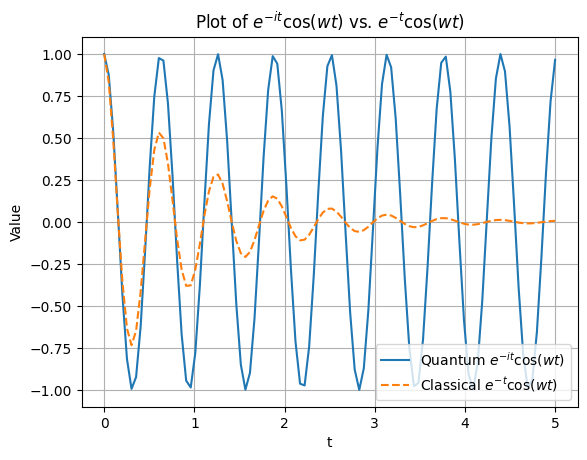

In [6]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# Define the quantum device and the number of qubits
num_qubits = 1
dev = qml.device("default.qubit", wires=num_qubits)

# Quantum circuit
@qml.qnode(dev)
def circuit(params, t, w):
    qml.RZ(-t, wires=0)
    qml.RX(w * t, wires=0)
    qml.RZ(-t, wires=0)

    return qml.expval(qml.PauliZ(0))

# Classical function for (e^-t)cos(wt)
def classical_function(t, w):
    return np.exp(-t) * np.cos(w * t)

# Parameters
w = 10.0  # Replace with your desired value of w
t_values = np.linspace(0, 5, 100)  # Values of t from 0 to 5

# Evaluate the quantum circuit for each t and store the results
quantum_results = []
for t in t_values:
    result = circuit([0], t, w)
    quantum_results.append(result)

# Evaluate the classical function for each t
classical_results = [classical_function(t, w) for t in t_values]

# Plot both quantum and classical results
plt.plot(t_values, quantum_results, label=r"Quantum $e^{-it}\cos(wt)$")
plt.plot(t_values, classical_results, label=r"Classical $e^{-t}\cos(wt)$", linestyle="--")
plt.xlabel("t")
plt.ylabel("Value")
plt.title(r"Plot of $e^{-it}\cos(wt)$ vs. $e^{-t}\cos(wt)$")
plt.legend()
plt.grid()
plt.show()
